In [1]:
# Importing preprocessed dataset
import pandas as pd
df = pd.read_csv('cleaned_data_more_features_filtered.csv')

In [2]:
print(df.shape)

(231610, 10)


In [3]:
df.describe()

,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,minutes,n_steps,n_ingredients,calories
count,231610.000000,231610.000000,231610.000000,231610.000000,231610.000000,231610.000000,2.316100e+05,231610.000000,231610.000000,231610.000000
mean,35.758033,82.000695,29.898981,34.475454,45.247541,15.301010,9.399586e+03,9.764837,9.051069,468.624464
std,63.946631,244.748418,115.626084,50.752417,89.271381,29.720792,4.462223e+06,5.992506,3.734546,681.550287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,8.000000,9.000000,5.000000,7.000000,7.000000,4.000000,2.000000e+01,6.000000,6.000000,174.300000
50%,20.000000,25.000000,14.000000,18.000000,23.000000,9.000000,4.000000e+01,9.000000,9.000000,313.400000
75%,41.000000,68.000000,33.000000,51.000000,52.000000,16.000000,6.500000e+01,12.000000,11.000000,519.600000
max,2713.000000,12914.000000,14664.000000,3351.000000,4610.000000,1098.000000,2.147484e+09,145.000000,43.000000,17287.500000


In [4]:
df.head()

,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,minutes,n_steps,n_ingredients,calories
0,0,13,0,2,0,4,55,11,7,51.5
1,18,0,17,22,35,1,30,9,6,173.4
2,22,32,48,39,27,5,130,6,13,269.8
3,17,10,2,14,8,20,45,11,11,368.1
4,1,337,23,3,0,28,190,5,8,352.9


In [5]:
#df = df.drop(columns=['name'])

In [6]:
df.head()

,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,minutes,n_steps,n_ingredients,calories
0,0,13,0,2,0,4,55,11,7,51.5
1,18,0,17,22,35,1,30,9,6,173.4
2,22,32,48,39,27,5,130,6,13,269.8
3,17,10,2,14,8,20,45,11,11,368.1
4,1,337,23,3,0,28,190,5,8,352.9


In [7]:
#Separating features X from labels y
y = df['calories'].to_numpy()
X = df.drop(columns=['calories']).to_numpy()

In [8]:
# Scaling the data and dividing dataset into training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2)

In [9]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test) #testing accuracy

0.9940989066508487

In [10]:
LR.score(X_train, y_train) #training accuracy

0.9935418230797265

In [11]:
#X_test = scaler.transform(X)
y_pred = LR.predict(X_test)
y_pred

array([473.99264982, 295.32821489, 232.38300223, ..., 504.72182315,
       402.98995672, 265.24665173])

In [12]:
print(y)

[ 51.5 173.4 269.8 ...  59.2 188.  174.9]


In [13]:
print(X)

[[  0  13   0 ...  55  11   7]
 [ 18   0  17 ...  30   9   6]
 [ 22  32  48 ... 130   6  13]
 ...
 [  6   2   3 ...  40   7   8]
 [ 11  57  11 ...  29   9  10]
 [ 14  33   4 ...  20   5   7]]


In [21]:
import numpy as np

# Creating a sample input
sample_input = np.array([22, 32, 48, 39, 27, 5, 130, 6, 13]) #This is the same as the third sample, so we're expecting something close to 269.8 calories

# Reshaping (1, num_features)
sample_input = sample_input.reshape(1, -1)

sample_input_scaled = scaler.transform(sample_input)  # Use the same scaler from training

# Making prediction
predicted_value = LR.predict(sample_input_scaled)

print("Predicted Calories:", predicted_value)

Predicted Calories: [277.69709828]


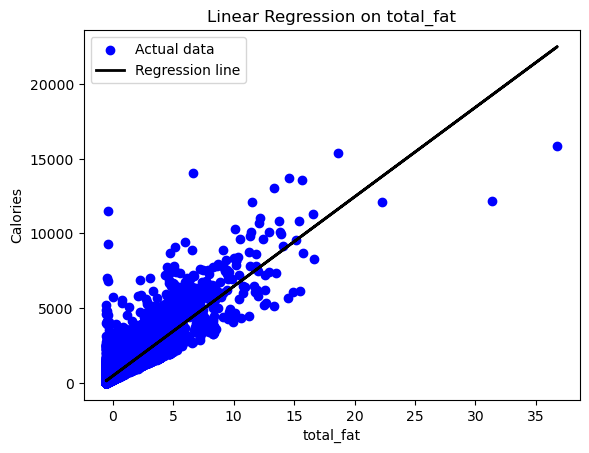

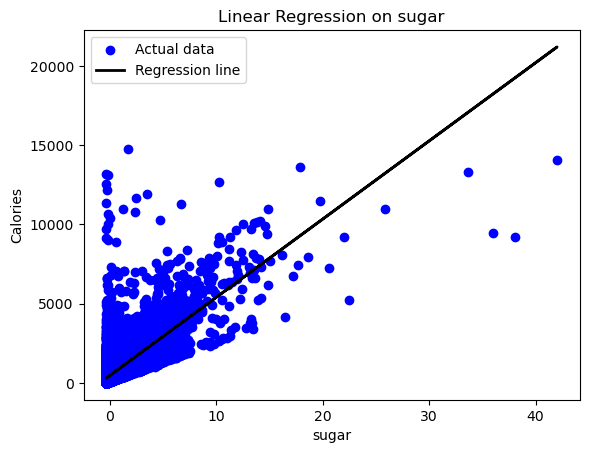

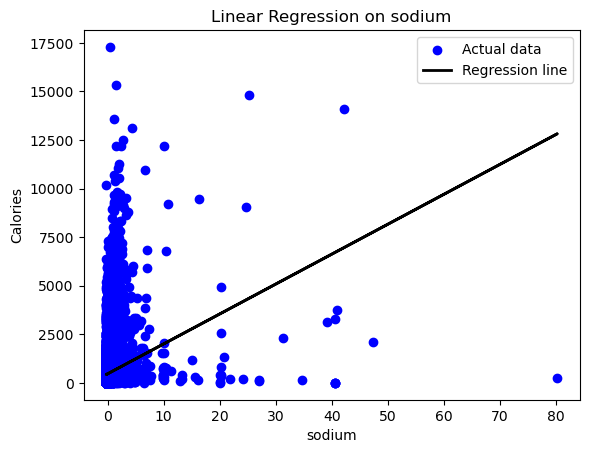

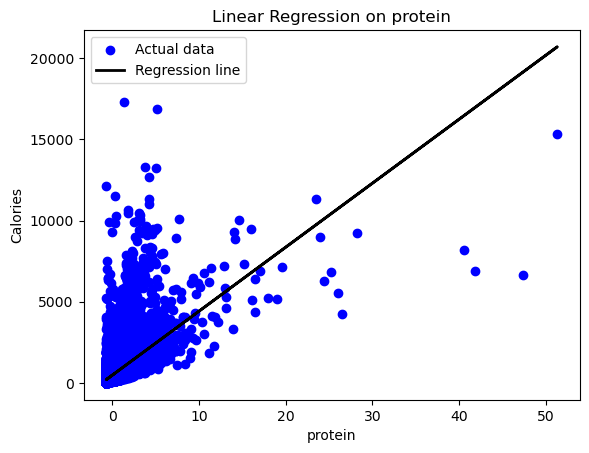

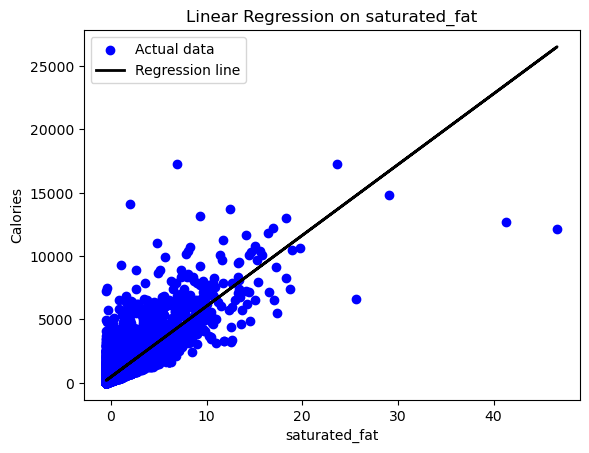

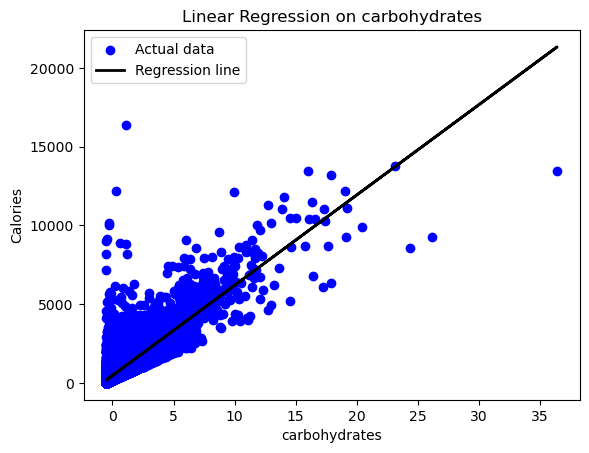

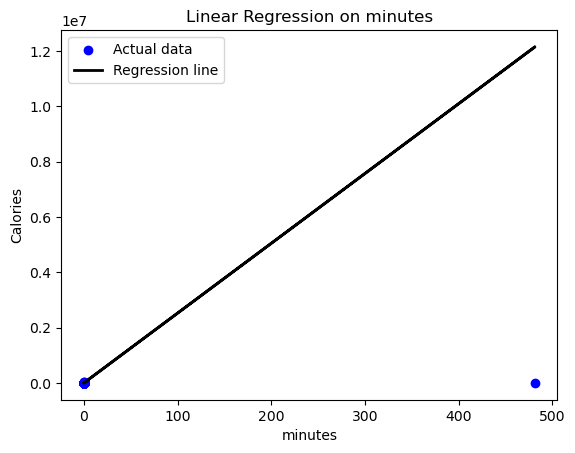

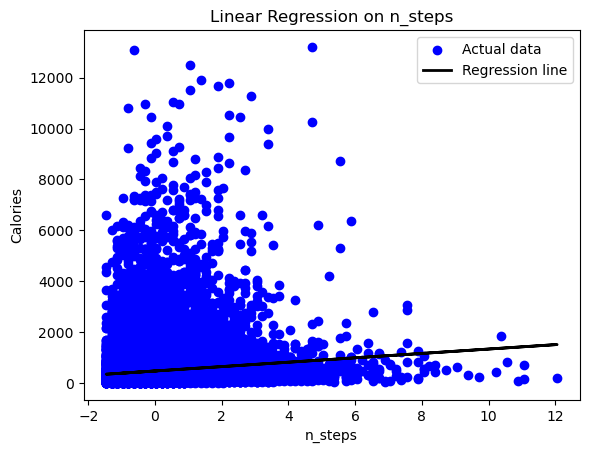

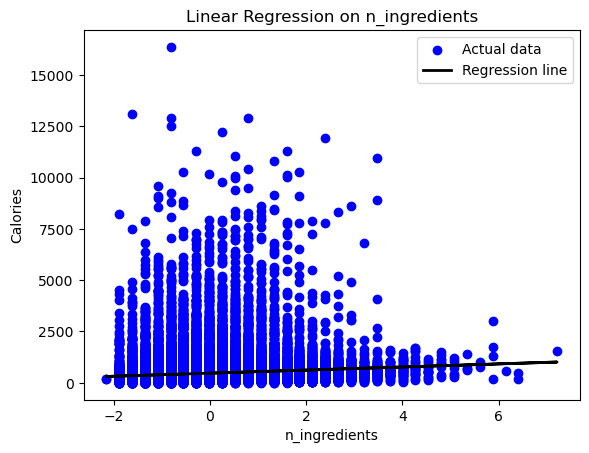

In [23]:
# Plotting linear regression between each nutrtional value and the calories
from matplotlib import pyplot as plt
for i in range(9):
    feature_index = i
    
    # Splitting using single feature
    X_single = X[:, feature_index].reshape(-1, 1)
    single_scaler = StandardScaler()
    X_single_scaled = single_scaler.fit_transform(X_single)
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single_scaled,y, test_size = 0.2)
    
    # Fitting model using only one feature
    LR_single = LinearRegression()
    LR_single.fit(X_train_single, y_train_single)
    
    y_pred_single = LR_single.predict(X_test_single)
    
    # Plotting the actual data points
    plt.scatter(X_test_single, y_test_single, color='b', label="Actual data")
    
    # Plotting the regression line
    plt.plot(X_test_single, y_pred_single, color='k', linewidth=2, label="Regression line")

    # Getting the feature names from the data
    feature_names = df.drop(columns=['calories']).columns
    feature_name = feature_names[feature_index]
    
    plt.xlabel(feature_name)
    plt.ylabel("Calories")
    plt.legend()
    plt.title(f"Linear Regression on {feature_name}")
    plt.show()

In [24]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
  
print("MAE:", mae) 
print("MSE:", mse) 
print("RMSE:", rmse)
print("r2:", r2)

MAE: 13.71917997106894
MSE: 2737.9727707113025
RMSE: 52.32564161776999
r2: 0.9940989066508487


In [25]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X, y, cv=5) #X and y will be split into folds
(scores)

array([   0.99271541,    0.99471612,    0.99411087, -685.41221373,
          0.99207703])

In [26]:
from sklearn.model_selection import cross_validate #more comprehensive: gives time, can show training scores, can show results for multiple metrics
scores = cross_validate(LR, X, y, cv=5, return_train_score= True, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_squared_error')) #X and y will be split into folds
print(scores)

{'fit_time': array([0.06478453, 0.05979371, 0.05817246, 0.05507374, 0.06109667]), 'score_time': array([0.00737214, 0.00649071, 0.00400829, 0.00739145, 0.00401974]), 'test_r2': array([   0.99271541,    0.99471612,    0.99411087, -685.41221373,
          0.99207703]), 'train_r2': array([0.99388872, 0.99336183, 0.99354073, 0.99355289, 0.99397997]), 'test_neg_root_mean_squared_error': array([   -58.45916918,    -51.27936749,    -51.78957225, -18473.33652557,
          -56.42521223]), 'train_neg_root_mean_squared_error': array([-53.20815961, -55.03119491, -54.90733819, -54.23731157,
       -53.75329126]), 'test_neg_mean_absolute_error': array([-14.23648013, -13.86561455, -13.8145401 , -99.77758729,
       -13.61214714]), 'train_neg_mean_absolute_error': array([-13.66767033, -13.96294267, -13.95968921, -13.75276293,
       -14.06479128]), 'test_neg_mean_squared_error': array([-3.41747446e+03, -2.62957353e+03, -2.68215979e+03, -3.41264162e+08,
       -3.18380458e+03]), 'train_neg_mean_squared

In [27]:
scores_df = pd.DataFrame(scores)
summary_df = scores_df.mean().to_frame(name="Mean")
summary_df["Std Dev"] = scores_df.std()
print(summary_df)

                                           Mean       Std Dev
fit_time                           5.978422e-02  3.588596e-03
score_time                         5.856466e-03  1.720831e-03
test_r2                           -1.362877e+02  3.069699e+02
train_r2                           9.936648e-01  2.594145e-04
test_neg_root_mean_squared_error  -3.738258e+03  8.237160e+03
train_neg_root_mean_squared_error -5.422746e+01  7.700861e-01
test_neg_mean_absolute_error      -3.106127e+01  3.841425e+01
train_neg_mean_absolute_error     -1.388157e+01  1.648018e-01
test_neg_mean_squared_error       -6.825522e+07  1.526166e+08
train_neg_mean_squared_error      -2.941092e+03  8.341268e+01
